In [573]:
# Importing essential NN libraries
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix,precision_score
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# For Math
import numpy as np
import os

# For Data Viz.
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

In [552]:
# Load MNIST dataset from Keras
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [553]:
x_train.shape

(60000, 28, 28)

### Before Nomalizing input lables

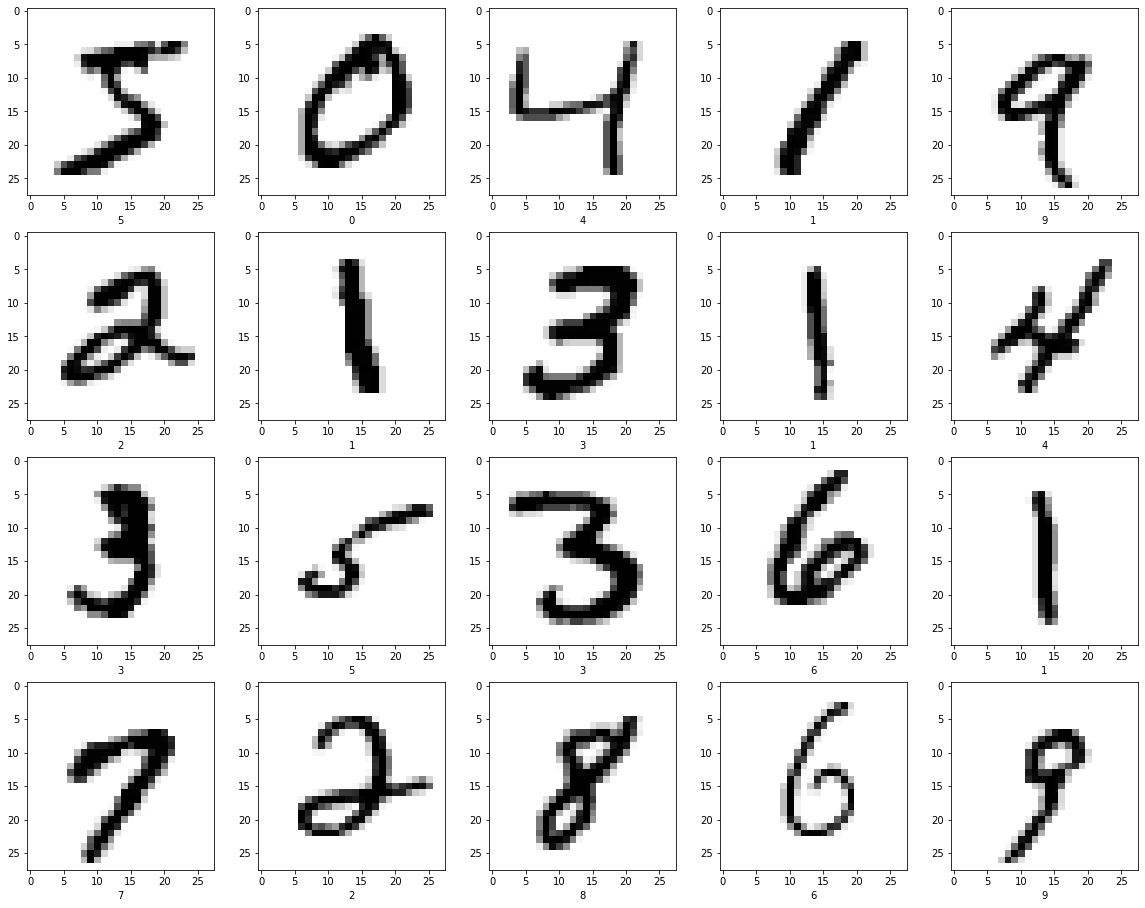

In [554]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [555]:
# Data normalization - Step 2
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### After Normalizing input lables

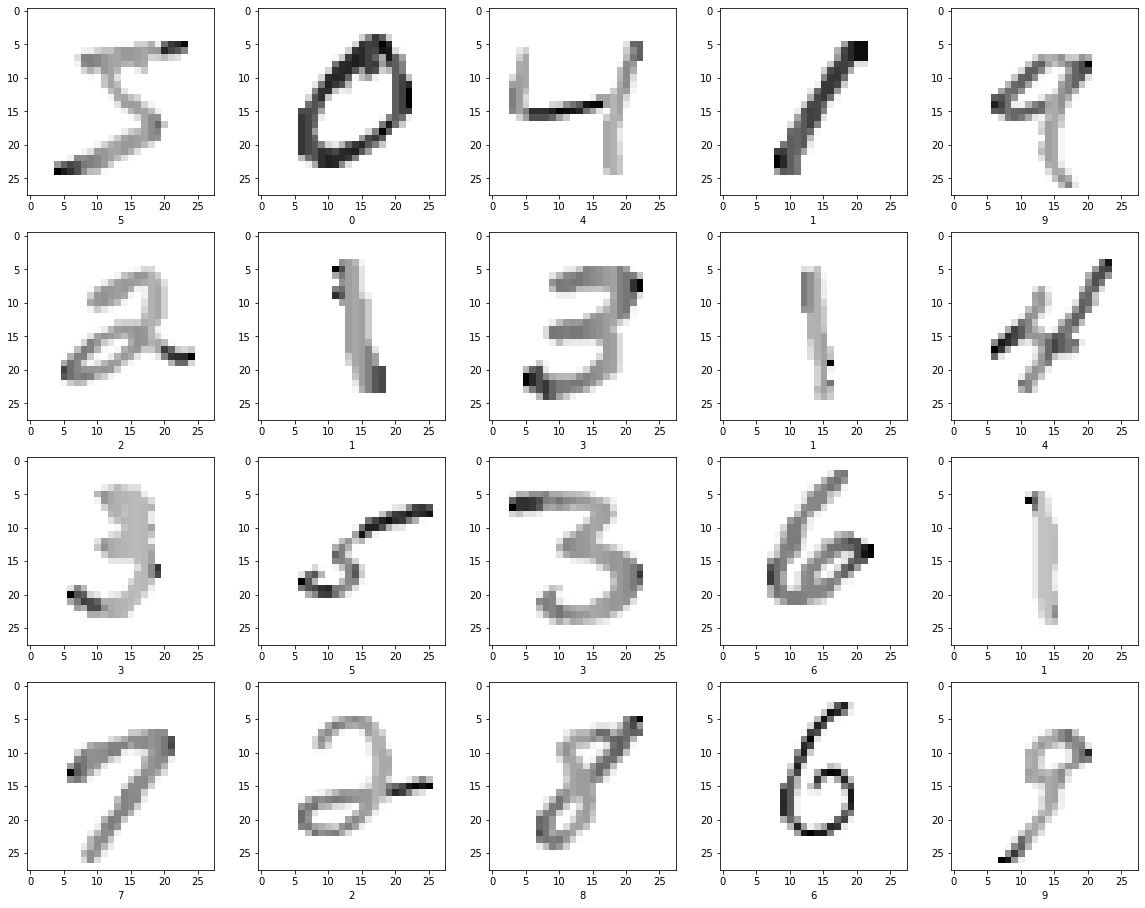

In [556]:
# Plotting the figures in the dataset using Matplotlib
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

**Observation**: Images are distorted after scalling the dataset as there will be loss of exact data as the values in the 2d matrix are scaled between 0 and 1. However, this will help in impoving the accuracy or in other words, we can reduce the loss and this enables the model to converge towards a decent much faster

In [557]:
# Shape of the input x_train data
print("Shape of the input x_train data before reshaping:")
print("(",x_train.shape[1],",",x_train.shape[2],")")

Shape of the input x_train data before reshaping:
( 28 , 28 )


In [558]:
# Reshaping 2D image data to 1D 
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

### After reshaping to 1D array

In [559]:
# Displaying the shapes of the train and test input datasets 
print("Shape of x_train: ")
print("(", x_train_flattened.shape[1],",", "1)")
print()
print("Shape of x_test: ")
print("(", x_test_flattened.shape[1],",", "1)")

Shape of x_train: 
( 784 , 1)

Shape of x_test: 
( 784 , 1)


In [560]:
# One hot encoding for categorical target labels 
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Transforming above target labels for a given sample into an array of 1s and 0s where the index of the number 1 indicates the digit the image represents. We do this because otherwise our model would interpret the digit 9 as having a higher priority than the number 3

**Neural Network Architecture:**
<br>
<br>
Number of classes: 10 (Ten unique digits)
<br>
<br>
Number of layers: 4
<br>
<br>
Number of Nodes in each layer: 64
<br>
<br>
Activation funtions used in each layer: 
- Input layer => Relu
- Hidden layer => Relu
- Output layer => Softmax (multi-class classification problem)

In [561]:
# Stochastic Gradient Decent is being used as an optimizer for this problem 

# Setting the params for Stochastic Gradient Decent
num_classes = 10
epochs = 65
learningRate = 0.1
decay_rate = learningRate/epochs # As the epochs increase the decay rate decreases
momentum_value = 0.8

# Stochastic Gradient Decent for compiling the NN model later
#Default values for SGD. lr=0.1, m=0, decay=0
#Nesterov has stronger theoretical converge guarantees for convex functions.
sgd = keras.optimizers.SGD(learning_rate = learningRate, momentum = momentum_value, decay = decay_rate, nesterov=False)

In [562]:
# Flattened input dimension
input_dim = x_train_flattened.shape[1] # The input layer requires the special input_shape parameter which should match
print("Input shape to be fed into the input layer:", input_dim)

Input shape to be fed into the input layer: 784


In [563]:
# Building the NN model - 1

def nn_model():
    
    # Model type selected
    model = Sequential()
    
    # Dense layers are fully connected layers
    # Adding a input dense layer with input number of nodes = 64, Using Relu as activation function, 
    # setting uniform weights to the nodes 
    model.add(Dense(64, activation='relu', kernel_initializer='uniform', input_dim = input_dim)) 
    
    # Adding dropout at this layer as 20% for avoiding overfitting 
    model.add(Dropout(0.3))
    
    # Adding hidden layer with same params
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    
    # Adding the last layer with softmax activation as this is a multi-class classification problem 
    model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
    
    # Compile the model using loss as categorical_crossentropy as this is a classification problem with the params defined above
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    
    return model

In [564]:
# Model summary
exp_model = nn_model()
print(exp_model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_74 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [565]:
# Exponential decay used instead of static learning rate of 0.1
# 𝑙𝑟 = 𝑙𝑟₀ × 𝑒**(−𝑘𝑡) # Instead of constant steps for learning rate a decreasing exponential function is used as epochs go by

def exp_decay(epoch):
    lrate = learningRate * np.exp(-decay_rate*epoch)
    return lrate

In [566]:
# learning schedule callback
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list_for_model_1 = [lr_rate, model_checkPoint]

In [567]:
# Creating Model Checkpoint

# Specifying the path where the file has to be stored 
checkpoint_path = r"C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5"

# Create a callback that saves the model's weights
model_checkPoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, 
                                                save_weights_only=True,
                                                save_freq=20)

In [568]:
# Fitting the model

# Batch Size 
batch_size = 100

# Fitting model with all params
exp_history = exp_model.fit(x_train_flattened, y_train, batch_size = batch_size, epochs= epochs, callbacks= callbacks_list_for_model_1, verbose=1,
                        validation_data=(x_test_flattened, y_test))


Epoch 1/65
  1/600 [..............................] - ETA: 2:40 - loss: 2.3031 - acc: 0.0500
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 2.3026 - acc: 0.0895  
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s - loss: 2.3005 - acc: 0.1002
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 1s - loss: 2.2961 - acc: 0.1189
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 1s - loss: 2.2785 - acc: 0.1600
Epoch 00001: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS 

201/600 [=========>....................] - ETA: 1s - loss: 0.3022 - acc: 0.9099
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.3000 - acc: 0.9105
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.2985 - acc: 0.9107
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.2976 - acc: 0.9113
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 0s - loss: 0.2942 - acc: 0.9125
Epoch 00002: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

410/600 [===================>..........] - ETA: 0s - loss: 0.2276 - acc: 0.9315
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
425/600 [====================>.........] - ETA: 0s - loss: 0.2259 - acc: 0.9319
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.2260 - acc: 0.9320
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.2256 - acc: 0.9320
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
481/600 [=======================>......] - ETA: 0s - loss: 0.2265 - acc: 0.9320
Epoch 00003: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

600/600 [==============================] - 2s 3ms/step - loss: 0.1996 - acc: 0.9405 - val_loss: 0.1395 - val_acc: 0.9588
Epoch 5/65
  1/600 [..............................] - ETA: 5s - loss: 0.2430 - acc: 0.9200
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 23/600 [>.............................] - ETA: 1s - loss: 0.2018 - acc: 0.9387
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 48/600 [=>............................] - ETA: 1s - loss: 0.1899 - acc: 0.9446
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 73/600 [==>...........................] - ETA: 1s - loss: 0.1926 - acc: 0.9434
Epoch 00005: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 92/600 [===>..........................] - ETA: 1s -

182/600 [========>.....................] - ETA: 1s - loss: 0.1729 - acc: 0.9466
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.1709 - acc: 0.9480
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
222/600 [==========>...................] - ETA: 1s - loss: 0.1695 - acc: 0.9486
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
243/600 [===========>..................] - ETA: 1s - loss: 0.1701 - acc: 0.9485
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
262/600 [============>.................] - ETA: 0s - loss: 0.1721 - acc: 0.9481
Epoch 00006: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

394/600 [==================>...........] - ETA: 1s - loss: 0.1648 - acc: 0.9498
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
413/600 [===================>..........] - ETA: 0s - loss: 0.1656 - acc: 0.9497
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
438/600 [====================>.........] - ETA: 0s - loss: 0.1655 - acc: 0.9498
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
459/600 [=====================>........] - ETA: 0s - loss: 0.1655 - acc: 0.9499
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
477/600 [======================>.......] - ETA: 0s - loss: 0.1647 - acc: 0.9502
Epoch 00007: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

585/600 [============================>.] - ETA: 0s - loss: 0.1586 - acc: 0.9533
Epoch 00008: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.1591 - acc: 0.9530 - val_loss: 0.1205 - val_acc: 0.9644
Epoch 9/65
  1/600 [..............................] - ETA: 1s - loss: 0.3176 - acc: 0.8700
Epoch 00009: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 0.1674 - acc: 0.9486
Epoch 00009: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s - loss: 0.1568 - acc: 0.9520
Epoch 00009: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 1s -

177/600 [=======>......................] - ETA: 1s - loss: 0.1487 - acc: 0.9547
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
194/600 [========>.....................] - ETA: 1s - loss: 0.1495 - acc: 0.9549
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
213/600 [=========>....................] - ETA: 1s - loss: 0.1499 - acc: 0.9550
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
233/600 [==========>...................] - ETA: 0s - loss: 0.1505 - acc: 0.9552
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
254/600 [===========>..................] - ETA: 0s - loss: 0.1505 - acc: 0.9554
Epoch 00010: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

361/600 [=================>............] - ETA: 0s - loss: 0.1462 - acc: 0.9549
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1445 - acc: 0.9556
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1451 - acc: 0.9552
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
422/600 [====================>.........] - ETA: 0s - loss: 0.1443 - acc: 0.9554
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.1444 - acc: 0.9557
Epoch 00011: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

561/600 [===========================>..] - ETA: 0s - loss: 0.1431 - acc: 0.9571
Epoch 00012: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
591/600 [============================>.] - ETA: 0s - loss: 0.1423 - acc: 0.9574
Epoch 00012: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.1423 - acc: 0.9574 - val_loss: 0.1130 - val_acc: 0.9669
Epoch 13/65
  1/600 [..............................] - ETA: 0s - loss: 0.2048 - acc: 0.9400
Epoch 00013: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 0.1300 - acc: 0.9610
Epoch 00013: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 42/600 [=>............................] - ETA: 1s 

145/600 [======>.......................] - ETA: 1s - loss: 0.1358 - acc: 0.9589
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
164/600 [=======>......................] - ETA: 1s - loss: 0.1351 - acc: 0.9587
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.1389 - acc: 0.9577
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.1378 - acc: 0.9587
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.1382 - acc: 0.9584
Epoch 00014: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

341/600 [================>.............] - ETA: 0s - loss: 0.1370 - acc: 0.9592
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1376 - acc: 0.9588
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1370 - acc: 0.9588
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1372 - acc: 0.9586
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.1361 - acc: 0.9588
Epoch 00015: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

541/600 [==========================>...] - ETA: 0s - loss: 0.1337 - acc: 0.9595
Epoch 00016: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1340 - acc: 0.9594
Epoch 00016: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - ETA: 0s - loss: 0.1333 - acc: 0.9596
Epoch 00016: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 4ms/step - loss: 0.1333 - acc: 0.9596 - val_loss: 0.1108 - val_acc: 0.9678
Epoch 17/65
  1/600 [..............................] - ETA: 0s - loss: 0.1467 - acc: 0.9500
Epoch 00017: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s 

121/600 [=====>........................] - ETA: 1s - loss: 0.1303 - acc: 0.9628
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.1316 - acc: 0.9623
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.1301 - acc: 0.9627
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.1290 - acc: 0.9628
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.1272 - acc: 0.9629
Epoch 00018: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

321/600 [===============>..............] - ETA: 0s - loss: 0.1269 - acc: 0.9617
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.1251 - acc: 0.9625
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1259 - acc: 0.9621
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1259 - acc: 0.9624
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1260 - acc: 0.9626
Epoch 00019: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

521/600 [=========================>....] - ETA: 0s - loss: 0.1267 - acc: 0.9611
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1264 - acc: 0.9611
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
562/600 [===========================>..] - ETA: 0s - loss: 0.1270 - acc: 0.9613
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1273 - acc: 0.9611
Epoch 00020: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.1275 - acc: 0.9612 - val_loss: 0.1055 - val_acc: 0.9696
Epoch 21/65
  1/600 [..............................] - ETA: 2s 

105/600 [====>.........................] - ETA: 1s - loss: 0.1144 - acc: 0.9656
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
133/600 [=====>........................] - ETA: 1s - loss: 0.1156 - acc: 0.9647
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
152/600 [======>.......................] - ETA: 1s - loss: 0.1198 - acc: 0.9641
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
166/600 [=======>......................] - ETA: 1s - loss: 0.1205 - acc: 0.9634
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
183/600 [========>.....................] - ETA: 1s - loss: 0.1224 - acc: 0.9630
Epoch 00022: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

301/600 [==============>...............] - ETA: 1s - loss: 0.1259 - acc: 0.9615
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
321/600 [===============>..............] - ETA: 1s - loss: 0.1252 - acc: 0.9621
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.1248 - acc: 0.9621
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1238 - acc: 0.9624
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1231 - acc: 0.9626
Epoch 00023: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

504/600 [========================>.....] - ETA: 0s - loss: 0.1243 - acc: 0.9624
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
523/600 [=========================>....] - ETA: 0s - loss: 0.1244 - acc: 0.9624
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1236 - acc: 0.9627
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1235 - acc: 0.9627
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1242 - acc: 0.9623
Epoch 00024: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 89/600 [===>..........................] - ETA: 1s - loss: 0.1140 - acc: 0.9631
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
111/600 [====>.........................] - ETA: 1s - loss: 0.1165 - acc: 0.9630
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
122/600 [=====>........................] - ETA: 1s - loss: 0.1142 - acc: 0.9634
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.1159 - acc: 0.9628
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.1144 - acc: 0.9629
Epoch 00026: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

295/600 [=============>................] - ETA: 1s - loss: 0.1198 - acc: 0.9622
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
318/600 [==============>...............] - ETA: 1s - loss: 0.1199 - acc: 0.9622
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
334/600 [===============>..............] - ETA: 1s - loss: 0.1198 - acc: 0.9623
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 1s - loss: 0.1201 - acc: 0.9621
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 1s - loss: 0.1195 - acc: 0.9622
Epoch 00027: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

481/600 [=======================>......] - ETA: 0s - loss: 0.1198 - acc: 0.9632
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
501/600 [========================>.....] - ETA: 0s - loss: 0.1201 - acc: 0.9631
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
521/600 [=========================>....] - ETA: 0s - loss: 0.1198 - acc: 0.9630
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1195 - acc: 0.9631
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1203 - acc: 0.9628
Epoch 00028: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 61/600 [==>...........................] - ETA: 1s - loss: 0.1227 - acc: 0.9643
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 1s - loss: 0.1198 - acc: 0.9642
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
101/600 [====>.........................] - ETA: 1s - loss: 0.1201 - acc: 0.9633
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
121/600 [=====>........................] - ETA: 1s - loss: 0.1202 - acc: 0.9632
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.1177 - acc: 0.9639
Epoch 00030: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

261/600 [============>.................] - ETA: 1s - loss: 0.1164 - acc: 0.9640
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 1s - loss: 0.1152 - acc: 0.9643
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
301/600 [==============>...............] - ETA: 0s - loss: 0.1157 - acc: 0.9640
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
321/600 [===============>..............] - ETA: 0s - loss: 0.1162 - acc: 0.9640
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.1167 - acc: 0.9637
Epoch 00031: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

463/600 [======================>.......] - ETA: 0s - loss: 0.1148 - acc: 0.9645
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
481/600 [=======================>......] - ETA: 0s - loss: 0.1154 - acc: 0.9644
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
501/600 [========================>.....] - ETA: 0s - loss: 0.1154 - acc: 0.9645
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
521/600 [=========================>....] - ETA: 0s - loss: 0.1161 - acc: 0.9644
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1159 - acc: 0.9645
Epoch 00032: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 43/600 [=>............................] - ETA: 1s - loss: 0.1060 - acc: 0.9691
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 66/600 [==>...........................] - ETA: 1s - loss: 0.1093 - acc: 0.9670
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 82/600 [===>..........................] - ETA: 1s - loss: 0.1125 - acc: 0.9667
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
101/600 [====>.........................] - ETA: 1s - loss: 0.1097 - acc: 0.9677
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
121/600 [=====>........................] - ETA: 1s - loss: 0.1076 - acc: 0.9682
Epoch 00034: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

241/600 [===========>..................] - ETA: 1s - loss: 0.1138 - acc: 0.9653
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.1145 - acc: 0.9649
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 0s - loss: 0.1127 - acc: 0.9656
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
301/600 [==============>...............] - ETA: 0s - loss: 0.1118 - acc: 0.9660
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
321/600 [===============>..............] - ETA: 0s - loss: 0.1117 - acc: 0.9659
Epoch 00035: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

441/600 [=====================>........] - ETA: 0s - loss: 0.1117 - acc: 0.9662
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.1109 - acc: 0.9665
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
481/600 [=======================>......] - ETA: 0s - loss: 0.1112 - acc: 0.9664
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
501/600 [========================>.....] - ETA: 0s - loss: 0.1118 - acc: 0.9663
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
521/600 [=========================>....] - ETA: 0s - loss: 0.1118 - acc: 0.9661
Epoch 00036: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

 21/600 [>.............................] - ETA: 1s - loss: 0.1215 - acc: 0.9633
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s - loss: 0.1169 - acc: 0.9634
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 1s - loss: 0.1130 - acc: 0.9652
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 1s - loss: 0.1079 - acc: 0.9663
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
101/600 [====>.........................] - ETA: 1s - loss: 0.1097 - acc: 0.9657
Epoch 00038: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

221/600 [==========>...................] - ETA: 1s - loss: 0.1113 - acc: 0.9656
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.1111 - acc: 0.9657
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.1110 - acc: 0.9656
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 1s - loss: 0.1098 - acc: 0.9660
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
301/600 [==============>...............] - ETA: 0s - loss: 0.1105 - acc: 0.9659
Epoch 00039: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

421/600 [====================>.........] - ETA: 0s - loss: 0.1116 - acc: 0.9661
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.1118 - acc: 0.9661
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.1126 - acc: 0.9657
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
481/600 [=======================>......] - ETA: 0s - loss: 0.1127 - acc: 0.9657
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
501/600 [========================>.....] - ETA: 0s - loss: 0.1122 - acc: 0.9661
Epoch 00040: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

Epoch 42/65
  1/600 [..............................] - ETA: 0s - loss: 0.1052 - acc: 0.9600
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 0.1103 - acc: 0.9633
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s - loss: 0.1050 - acc: 0.9661
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 1s - loss: 0.1032 - acc: 0.9666
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 1s - loss: 0.0981 - acc: 0.9674
Epoch 00042: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\

201/600 [=========>....................] - ETA: 1s - loss: 0.1112 - acc: 0.9629
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.1113 - acc: 0.9633
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
260/600 [============>.................] - ETA: 1s - loss: 0.1117 - acc: 0.9629
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
279/600 [============>.................] - ETA: 1s - loss: 0.1110 - acc: 0.9633
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
281/600 [=============>................] - ETA: 1s - loss: 0.1110 - acc: 0.9633
Epoch 00043: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

401/600 [===================>..........] - ETA: 0s - loss: 0.1116 - acc: 0.9655
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.1113 - acc: 0.9657
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.1107 - acc: 0.9659
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.1112 - acc: 0.9654
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
481/600 [=======================>......] - ETA: 0s - loss: 0.1117 - acc: 0.9654
Epoch 00044: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

600/600 [==============================] - 2s 4ms/step - loss: 0.1104 - acc: 0.9658 - val_loss: 0.0999 - val_acc: 0.9714
Epoch 46/65
  1/600 [..............................] - ETA: 0s - loss: 0.1454 - acc: 0.9300
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 0.1193 - acc: 0.9629
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 41/600 [=>............................] - ETA: 1s - loss: 0.1131 - acc: 0.9661
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 61/600 [==>...........................] - ETA: 1s - loss: 0.1106 - acc: 0.9669
Epoch 00046: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 81/600 [===>..........................] - ETA: 1s 

181/600 [========>.....................] - ETA: 1s - loss: 0.1054 - acc: 0.9670
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.1053 - acc: 0.9673
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.1053 - acc: 0.9672
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
241/600 [===========>..................] - ETA: 1s - loss: 0.1061 - acc: 0.9668
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
261/600 [============>.................] - ETA: 1s - loss: 0.1054 - acc: 0.9670
Epoch 00047: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

381/600 [==================>...........] - ETA: 0s - loss: 0.1063 - acc: 0.9683
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1070 - acc: 0.9681
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.1065 - acc: 0.9681
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.1077 - acc: 0.9676
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
461/600 [======================>.......] - ETA: 0s - loss: 0.1082 - acc: 0.9674
Epoch 00048: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

581/600 [============================>.] - ETA: 0s - loss: 0.1078 - acc: 0.9670
Epoch 00049: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 4ms/step - loss: 0.1075 - acc: 0.9671 - val_loss: 0.0995 - val_acc: 0.9716
Epoch 50/65
 13/600 [..............................] - ETA: 2s - loss: 0.1071 - acc: 0.9638
Epoch 00050: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 34/600 [>.............................] - ETA: 3s - loss: 0.1081 - acc: 0.9650
Epoch 00050: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 59/600 [=>............................] - ETA: 3s - loss: 0.1109 - acc: 0.9661
Epoch 00050: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 63/600 [==>...........................] - ETA: 3s 

175/600 [=======>......................] - ETA: 1s - loss: 0.1096 - acc: 0.9666
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
196/600 [========>.....................] - ETA: 1s - loss: 0.1105 - acc: 0.9666
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
213/600 [=========>....................] - ETA: 1s - loss: 0.1111 - acc: 0.9664
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
236/600 [==========>...................] - ETA: 0s - loss: 0.1107 - acc: 0.9663
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
253/600 [===========>..................] - ETA: 0s - loss: 0.1109 - acc: 0.9662
Epoch 00051: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

361/600 [=================>............] - ETA: 0s - loss: 0.1061 - acc: 0.9669
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1065 - acc: 0.9666
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1067 - acc: 0.9668
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.1065 - acc: 0.9669
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
441/600 [=====================>........] - ETA: 0s - loss: 0.1067 - acc: 0.9668
Epoch 00052: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

561/600 [===========================>..] - ETA: 0s - loss: 0.1082 - acc: 0.9671
Epoch 00053: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1078 - acc: 0.9672
Epoch 00053: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 4ms/step - loss: 0.1076 - acc: 0.9673 - val_loss: 0.0996 - val_acc: 0.9715
Epoch 54/65
  1/600 [..............................] - ETA: 4s - loss: 0.0783 - acc: 0.9800
Epoch 00054: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s - loss: 0.0999 - acc: 0.9671
Epoch 00054: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 42/600 [=>............................] - ETA: 1s 

141/600 [======>.......................] - ETA: 1s - loss: 0.1039 - acc: 0.9697
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.1041 - acc: 0.9693
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.1030 - acc: 0.9690
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
201/600 [=========>....................] - ETA: 1s - loss: 0.1018 - acc: 0.9693
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
221/600 [==========>...................] - ETA: 1s - loss: 0.1032 - acc: 0.9691
Epoch 00055: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

341/600 [================>.............] - ETA: 0s - loss: 0.1067 - acc: 0.9678
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1064 - acc: 0.9679
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1076 - acc: 0.9678
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1072 - acc: 0.9679
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
421/600 [====================>.........] - ETA: 0s - loss: 0.1070 - acc: 0.9680
Epoch 00056: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

541/600 [==========================>...] - ETA: 0s - loss: 0.1065 - acc: 0.9667
Epoch 00057: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1069 - acc: 0.9667
Epoch 00057: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
583/600 [============================>.] - ETA: 0s - loss: 0.1068 - acc: 0.9669
Epoch 00057: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.1062 - acc: 0.9670 - val_loss: 0.0987 - val_acc: 0.9716
Epoch 58/65
  1/600 [..............................] - ETA: 0s - loss: 0.1633 - acc: 0.9500
Epoch 00058: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
 21/600 [>.............................] - ETA: 1s 

121/600 [=====>........................] - ETA: 1s - loss: 0.0976 - acc: 0.9694
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.1001 - acc: 0.9687
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.1009 - acc: 0.9683
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
182/600 [========>.....................] - ETA: 1s - loss: 0.1006 - acc: 0.9683
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
202/600 [=========>....................] - ETA: 1s - loss: 0.1015 - acc: 0.9683
Epoch 00059: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

321/600 [===============>..............] - ETA: 0s - loss: 0.1098 - acc: 0.9664
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.1105 - acc: 0.9663
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1096 - acc: 0.9665
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1090 - acc: 0.9668
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
401/600 [===================>..........] - ETA: 0s - loss: 0.1095 - acc: 0.9665
Epoch 00060: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

521/600 [=========================>....] - ETA: 0s - loss: 0.1040 - acc: 0.9681
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1045 - acc: 0.9679
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1043 - acc: 0.9679
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1044 - acc: 0.9679
Epoch 00061: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
600/600 [==============================] - 2s 3ms/step - loss: 0.1042 - acc: 0.9680 - val_loss: 0.0980 - val_acc: 0.9719
Epoch 62/65
  1/600 [..............................] - ETA: 3s 

101/600 [====>.........................] - ETA: 1s - loss: 0.0942 - acc: 0.9716
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
121/600 [=====>........................] - ETA: 1s - loss: 0.0970 - acc: 0.9711
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
141/600 [======>.......................] - ETA: 1s - loss: 0.0973 - acc: 0.9711
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
161/600 [=======>......................] - ETA: 1s - loss: 0.0974 - acc: 0.9712
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
181/600 [========>.....................] - ETA: 1s - loss: 0.0986 - acc: 0.9709
Epoch 00063: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

301/600 [==============>...............] - ETA: 0s - loss: 0.1024 - acc: 0.9688
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
321/600 [===============>..............] - ETA: 0s - loss: 0.1015 - acc: 0.9688
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
341/600 [================>.............] - ETA: 0s - loss: 0.1024 - acc: 0.9685
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
361/600 [=================>............] - ETA: 0s - loss: 0.1020 - acc: 0.9687
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
381/600 [==================>...........] - ETA: 0s - loss: 0.1025 - acc: 0.9685
Epoch 00064: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

501/600 [========================>.....] - ETA: 0s - loss: 0.1058 - acc: 0.9675
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
521/600 [=========================>....] - ETA: 0s - loss: 0.1064 - acc: 0.9674
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
541/600 [==========================>...] - ETA: 0s - loss: 0.1063 - acc: 0.9674
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
561/600 [===========================>..] - ETA: 0s - loss: 0.1064 - acc: 0.9674
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1\3.DSCI 633\HW\HW 5
581/600 [============================>.] - ETA: 0s - loss: 0.1061 - acc: 0.9674
Epoch 00065: saving model to C:\Users\prave\Desktop\V.3.0\1.Mind\1.Data Science\1.RIT MS DS\2.Semester 1

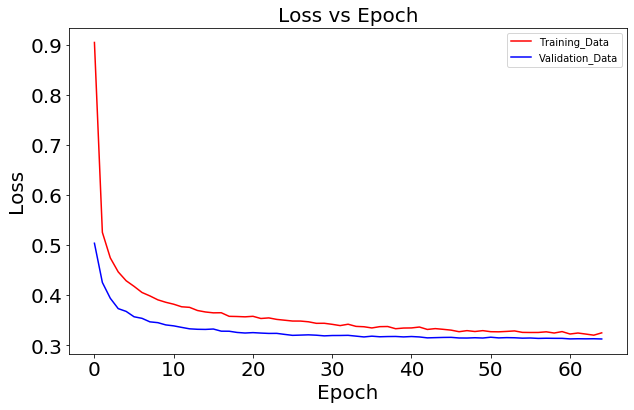

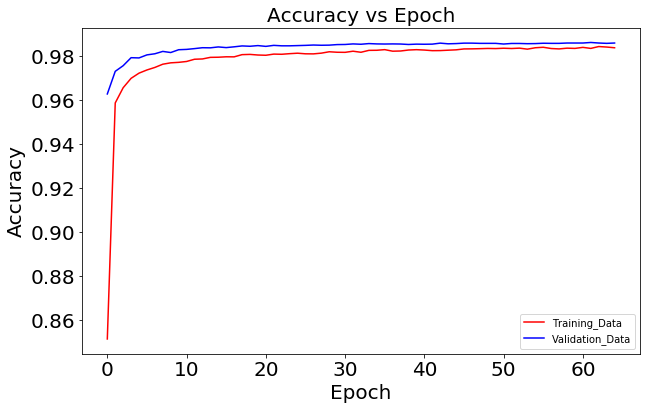

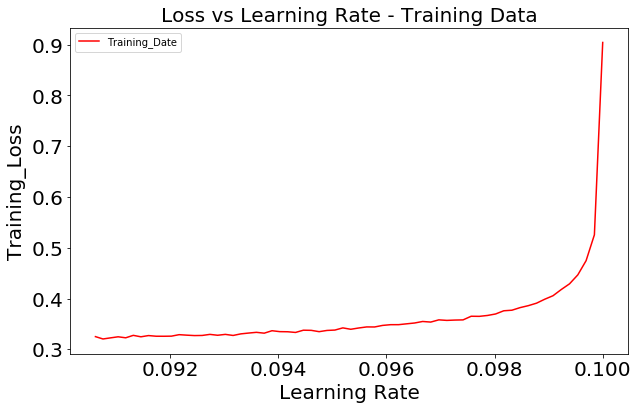

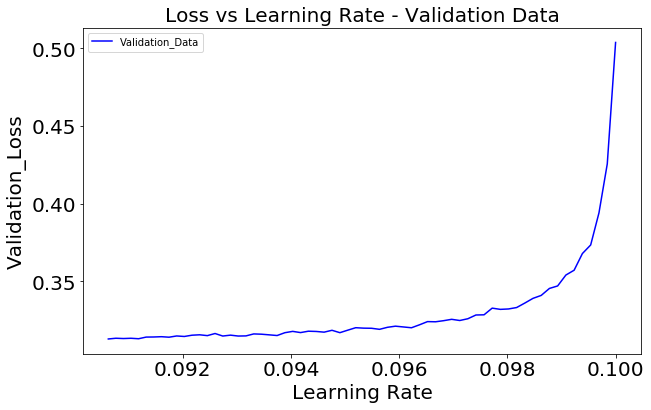

In [569]:
# Plotting for the model with exponential decay and without early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
x = exp_history.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Training_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='r')
plt.legend(["Training_Date"])
plt.show()

# Plotting the Loss vs Learning Rate of Validation data
x = exp_history.history["lr"] #learning_Rate_for_every_epoch
y = np.sqrt(exp_history.history['val_loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Validation Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Validation_Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(x, y, color='b')
plt.legend(["Validation_Data"])
plt.show()

# Plot the loss, ignore 20 batches in the beginning and 5 in the end
# callbacks.lr_finder
# lr_finder = LRFinder(model)
# lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)


**The learning rate shoots up when the learning rate is crossing 0.098**

In [570]:
# Setting early stopping
# Desired metric: loss of the validation dataset 
# Training gets terminated at an Epoch when the there is an increase of val_loss value
custom_earlyStopping = EarlyStopping(monitor='val_loss',
                                            min_delta=0.001,
                                            patience=8,
                                            verbose=1,
                                            mode='auto',
                                            baseline=None,
                                            restore_best_weights=False,)

In [571]:
# Fitting model with all params and early stopping (custom values)
exp_history_with_early_stopping = exp_model.fit(x_train_flattened, y_train, batch_size = batch_size, epochs= epochs,
                            callbacks= [lr_rate, custom_earlyStopping], verbose=1,
                            validation_data=(x_test_flattened, y_test)) 

Epoch 1/65
600/600 [==============================] - 1s 2ms/step - loss: 0.1048 - acc: 0.9672 - val_loss: 0.0981 - val_acc: 0.9720
Epoch 2/65
600/600 [==============================] - 1s 2ms/step - loss: 0.1034 - acc: 0.9675 - val_loss: 0.0978 - val_acc: 0.9724
Epoch 3/65
600/600 [==============================] - 1s 2ms/step - loss: 0.1039 - acc: 0.9685 - val_loss: 0.0979 - val_acc: 0.9725
Epoch 4/65
600/600 [==============================] - 1s 2ms/step - loss: 0.1027 - acc: 0.9682 - val_loss: 0.0978 - val_acc: 0.9725
Epoch 5/65
600/600 [==============================] - 1s 2ms/step - loss: 0.1043 - acc: 0.9679 - val_loss: 0.0971 - val_acc: 0.9725
Epoch 6/65
600/600 [==============================] - 1s 2ms/step - loss: 0.1028 - acc: 0.9683 - val_loss: 0.0976 - val_acc: 0.9725
Epoch 7/65
600/600 [==============================] - 1s 2ms/step - loss: 0.1013 - acc: 0.9694 - val_loss: 0.0980 - val_acc: 0.9725
Epoch 8/65
600/600 [==============================] - 1s 2ms/step - loss: 0.

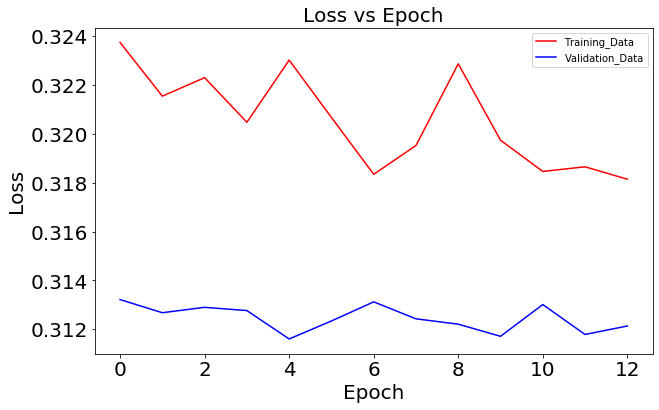

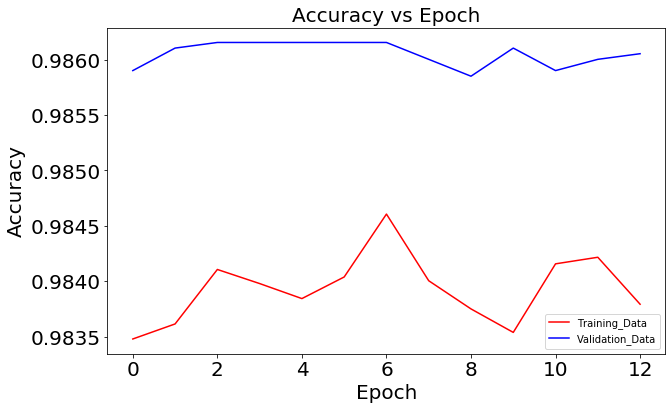

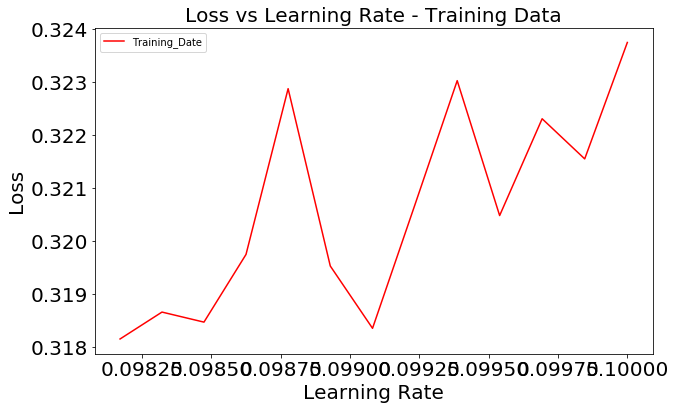

In [572]:
# Plotting for the model with exponential decay and with early stopping

# Plotting the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.title('Loss vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history_with_early_stopping.history['loss']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_early_stopping.history['val_loss']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the accuracy
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.title('Accuracy vs Epoch', fontsize=20)
ax.plot(np.sqrt(exp_history_with_early_stopping.history['acc']), 'r', label='Training_Data')
ax.plot(np.sqrt(exp_history_with_early_stopping.history['val_acc']), 'b' ,label='Validation_Data')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plotting the Loss vs Learning Rate of Training data
a = exp_history_with_early_stopping.history["lr"]
b = np.sqrt(exp_history_with_early_stopping.history['loss'])
figure(figsize=(10,6))
plt.title('Loss vs Learning Rate - Training Data', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.tick_params(labelsize=20)
plt.plot(a, b, color='r')
plt.legend(["Training_Date"])
plt.show()


**Observation on accuracy of validation data: 97.52%**

In [576]:
# Getting the latest checkpoint file
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)

# Create a new model instance
model_latest_checkpoint = nn_model()

# Load the previously saved weights
model_latest_checkpoint.load_weights(latest)

# Re-evaluate the model
loss, acc = model_latest_checkpoint.evaluate(x_test_flattened,  y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 0s - loss: 0.0979 - acc: 0.9719
Restored model, accuracy: 97.19%
